In [1]:
from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from loreal_poc.marks.facial_parts import FacialParts
from loreal_poc.visualisation.draw import draw_marks

In [2]:
ds = DataLoader300W(dir_path="300W/sample")

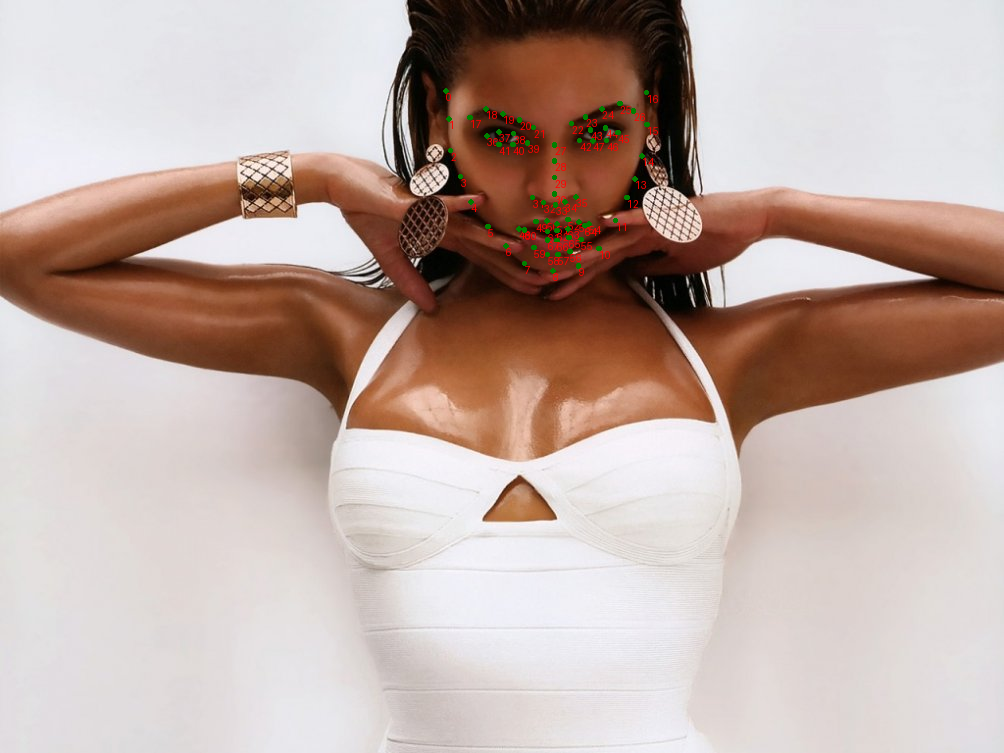

In [3]:
image, marks, meta = ds[0]
draw_marks(image, [marks], ["green"], [True])

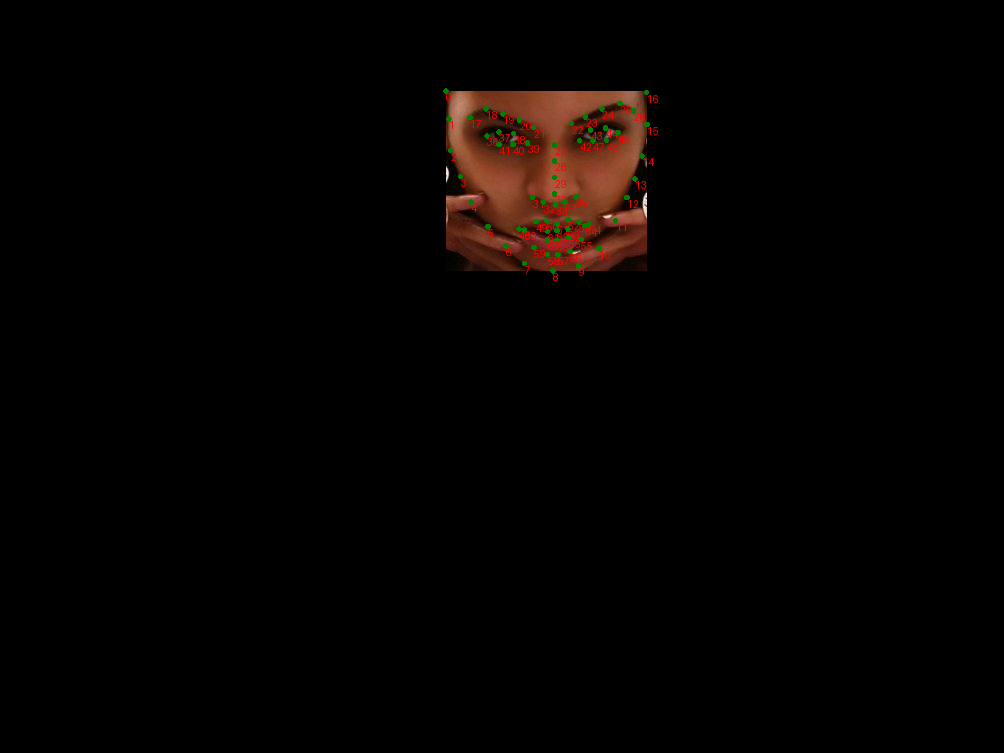

In [4]:
cropped_ds = CroppedDataLoader(ds, FacialParts.entire)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

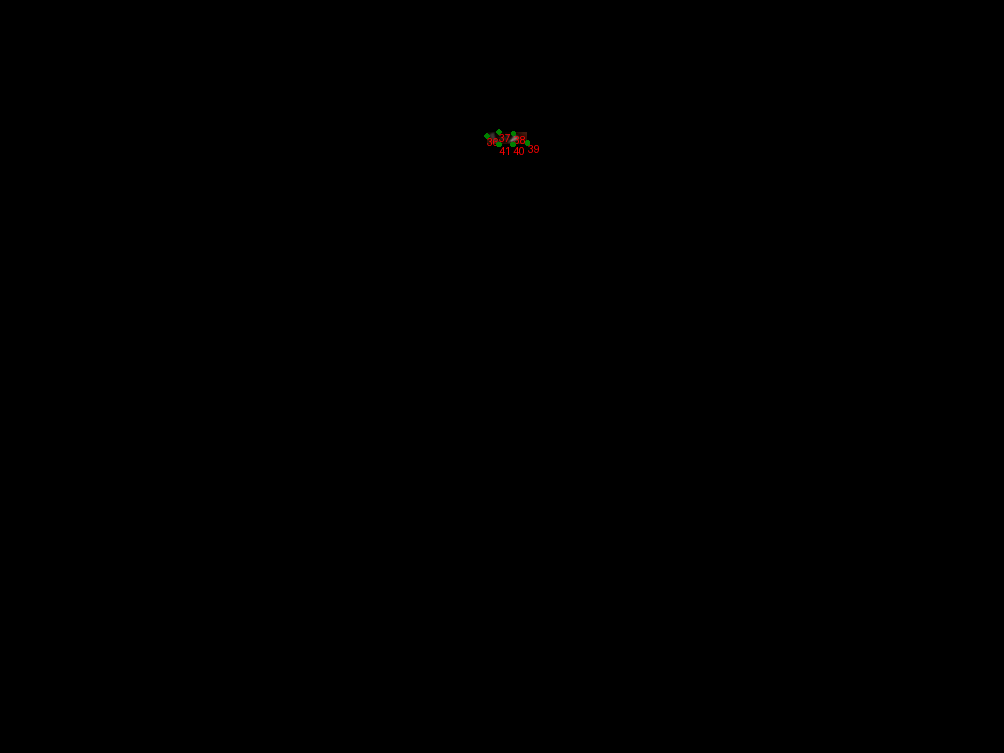

In [5]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

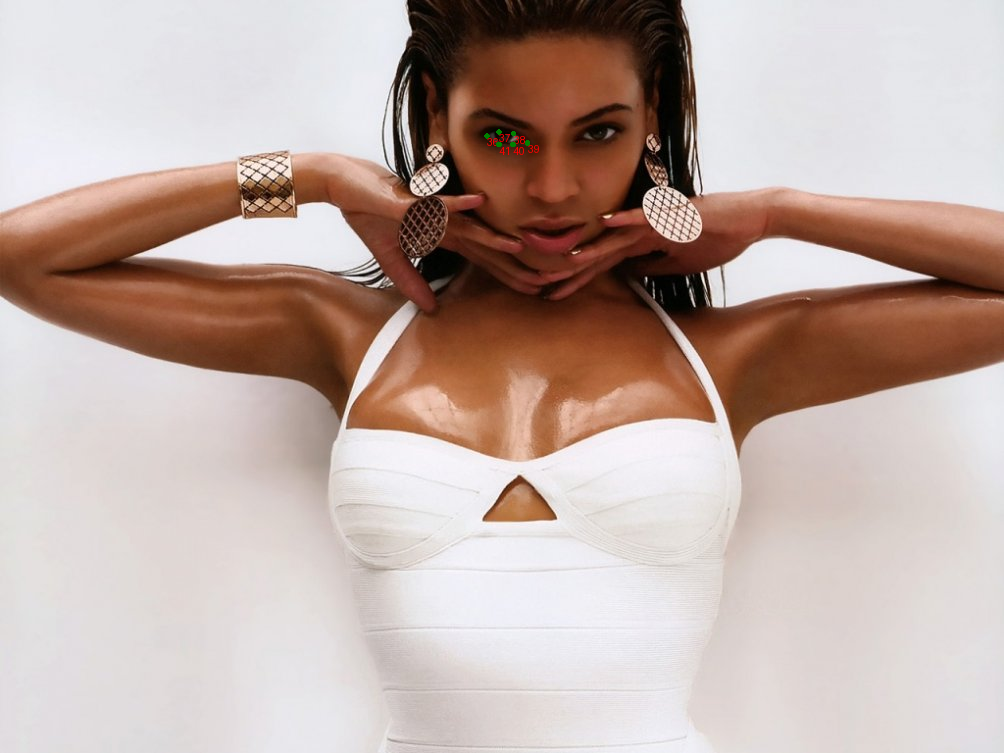

In [6]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye, crop_img=False)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

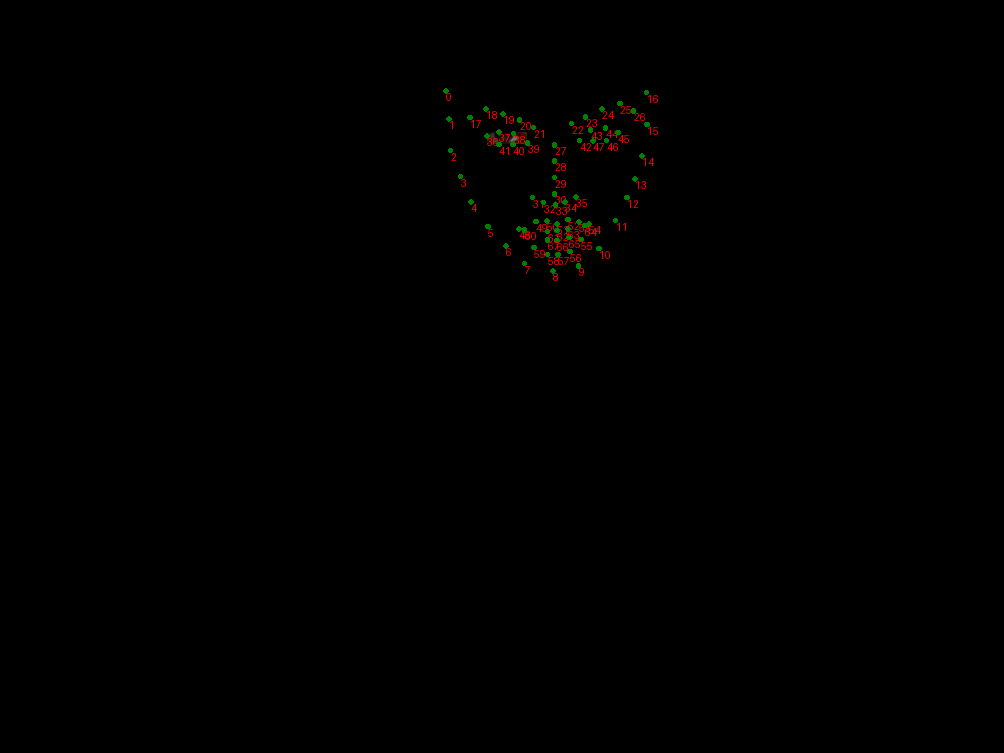

In [7]:
cropped_ds = CroppedDataLoader(ds, FacialParts.left_eye, crop_marks=False)
image, marks, meta = cropped_ds[0]
draw_marks(image, [marks], ["green"], [True])

In [8]:
%%timeit
dataset = CroppedDataLoader(ds, FacialParts.left_eye)
[elt for elt in dataset]

73.8 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit
dataset = CroppedDataLoader(ds, FacialParts.left_eye)
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]

302 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
dataset = CachedDataLoader(CroppedDataLoader(ds, FacialParts.left_eye))
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]
[elt for elt in dataset]

66 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
